<a href="https://colab.research.google.com/github/MaryamAshraff2/unsupervised-housing-clustering/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-MEANS CLUSTERING**

**UPLOADING DATASET AND DISPLAYING**

In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)

Saving housing - housing (1).csv to housing - housing (1).csv


In [3]:
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


**PRE-PROCESSING**

In [4]:
# Handle Missing Values
numerical_cols = df.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

#Drop columns with a high percentage of missing values
threshold = 0.7 * len(df)
df.dropna(axis=1, thresh=threshold, inplace=True)

# Convert Categorical to Numeric and Feature Scaling
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply preprocessing
df_processed = preprocessor.fit_transform(df)

In [5]:
# Get the column names after one-hot encoding
# This can be a bit tricky because OneHotEncoder reorders columns
# We need to get the names from the preprocessor

# Get the names of the one-hot encoded features
# This might need adjustment based on your specific column names
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine the numerical and one-hot encoded feature names
all_feature_names = list(numerical_cols) + list(categorical_feature_names)

# Create a new DataFrame from the processed data
df_processed_df = pd.DataFrame(data=df_processed, columns=all_feature_names)

# Print the new table
print(df_processed_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1  -1.322844  1.043185           -0.607019     2.045890        1.355088   
2  -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3  -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4  -1.337818  1.038503            1.856182    -0.462404       -0.615066   

   population  households  median_income  median_house_value  \
0   -0.974429   -0.977033       2.344766            2.129631   
1    0.861439    1.669961       2.332238            1.314156   
2   -0.820777   -0.843637       1.782699            1.258693   
3   -0.766028   -0.733781       0.932968            1.165100   
4   -0.759847   -0.629157      -0.012881            1.172900   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1   

**FEATURE SELECTION**

In [6]:
# Assuming you are using all processed features for clustering
features_for_clustering = df_processed

**DETERMINING OPTIMAL NUMBER OF K**

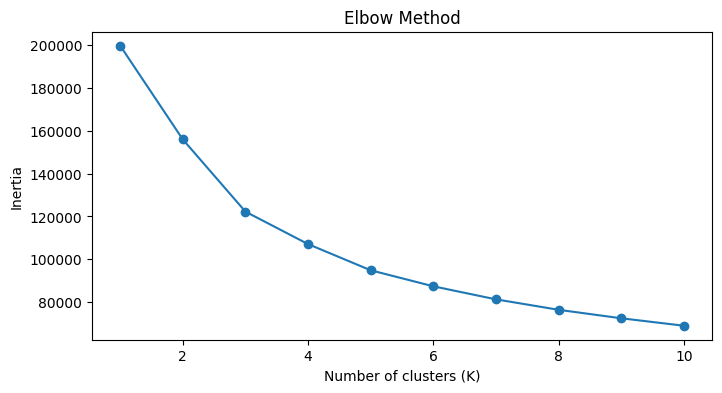

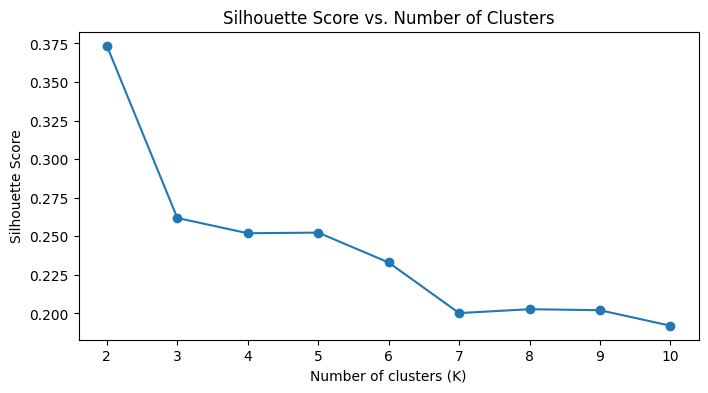

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
k_range = range(1, 11) # Experiment with a different range of K values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_for_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Score (Calculate for a reasonable range of K after the elbow method)
# Choose a range of K values to evaluate after observing the elbow plot
silhouette_scores = []
k_range_silhouette = range(2, 11) # K must be > 1 for silhouette score
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_for_clustering)
    score = silhouette_score(features_for_clustering, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


In [8]:
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

**APPLYING K-MEANS ALGORITHM AND MODEL TRAINING**

In [9]:
# Fit the model
kmeans_model.fit(features_for_clustering)

# Get cluster labels
cluster_labels = kmeans_model.labels_

# Add Cluster Labels to Data
# You can add the labels to the original DataFrame or a new one
df['cluster'] = cluster_labels

**VISUALIZE CLUSTERS**

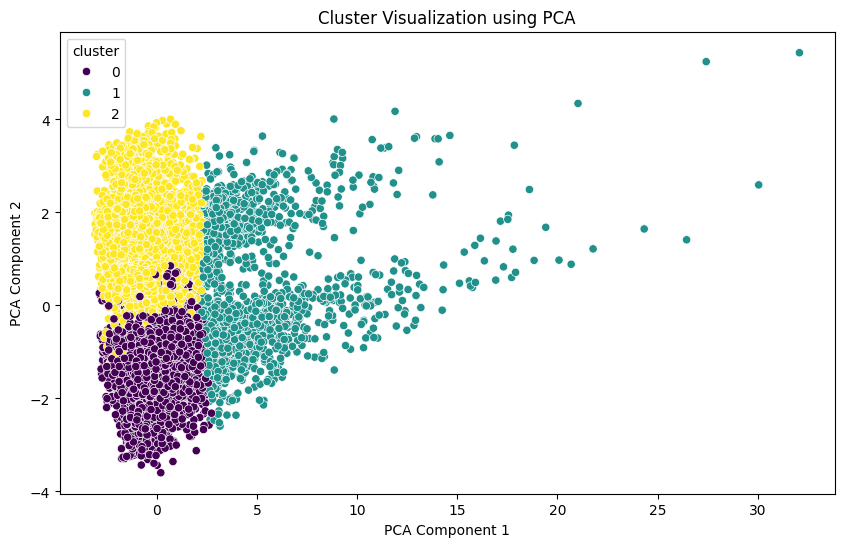

In [10]:
from sklearn.decomposition import PCA
import seaborn as sns

# Use PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_for_clustering)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=features_pca, columns=['PCA_1', 'PCA_2'])
df_pca['cluster'] = cluster_labels

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster', data=df_pca, palette='viridis', legend='full')
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# **MINI-BATCH K-MEANS CLUSTERING**

In [11]:
from sklearn.cluster import MiniBatchKMeans

In [12]:
# Apply Mini-Batch K-Means
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, n_init=10)
minibatch_kmeans_model.fit(features_for_clustering)

# Get cluster labels from Mini-Batch K-Means
minibatch_cluster_labels = minibatch_kmeans_model.labels_

# Add Mini-Batch Cluster Labels to Data
df['minibatch_cluster'] = minibatch_cluster_labels

In [13]:
# Calculate inertia for both models
standard_kmeans_inertia = kmeans_model.inertia_
minibatch_kmeans_inertia = minibatch_kmeans_model.inertia_

print(f"Standard K-Means Inertia: {standard_kmeans_inertia}")
print(f"Mini-Batch K-Means Inertia: {minibatch_kmeans_inertia}")

# You can also compare silhouette scores if desired
# standard_silhouette = silhouette_score(features_for_clustering, cluster_labels)
# minibatch_silhouette = silhouette_score(features_for_clustering, minibatch_cluster_labels)
# print(f"Standard K-Means Silhouette Score: {standard_silhouette}")
# print(f"Mini-Batch K-Means Silhouette Score: {minibatch_silhouette}")

Standard K-Means Inertia: 122225.25152867107
Mini-Batch K-Means Inertia: 122511.51502206417


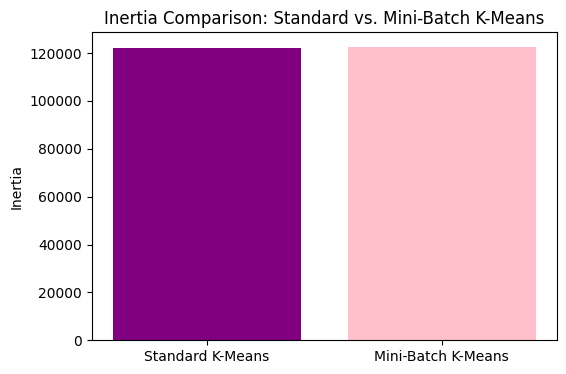

In [14]:
# Plot Inertia Comparison
labels = ['Standard K-Means', 'Mini-Batch K-Means']
inertia_values = [standard_kmeans_inertia, minibatch_kmeans_inertia]

plt.figure(figsize=(6, 4))
plt.bar(labels, inertia_values, color=['purple', 'pink'])
plt.ylabel('Inertia')
plt.title('Inertia Comparison: Standard vs. Mini-Batch K-Means')
plt.show()

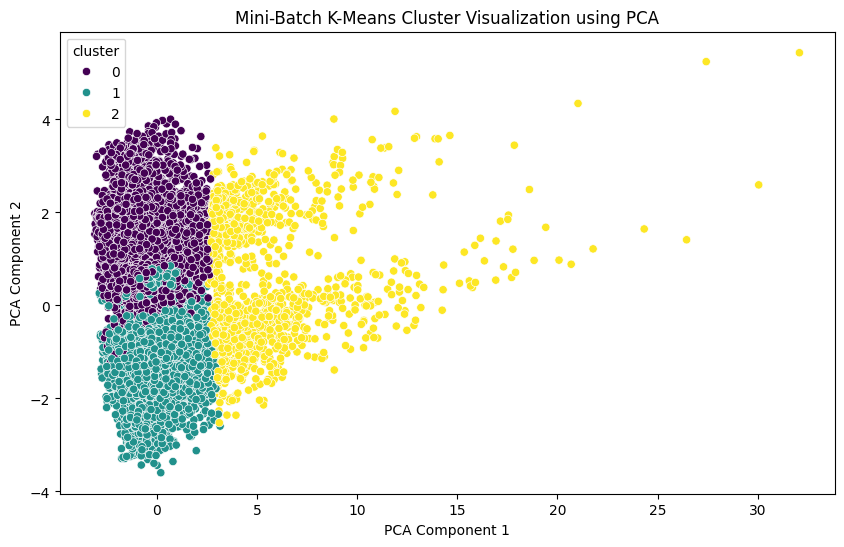

In [15]:
# Visualize Mini-Batch K-Means Clusters using PCA
df_pca_minibatch = pd.DataFrame(data=features_pca, columns=['PCA_1', 'PCA_2'])
df_pca_minibatch['cluster'] = minibatch_cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster', data=df_pca_minibatch, palette='viridis', legend='full')
plt.title('Mini-Batch K-Means Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()